# Assignment 1
## Authors go here maybe
### 1. Creating the scatter plot

The following cell will import the csv files and convert into dataframes, filtering the most recent entry (2019)

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


#Load dataframes
dfPerCapita = pd.read_csv('gdp-per-capita-penn-world-table.csv')
dfLE = pd.read_csv('life-expectancy.csv')
dfGDP = pd.read_csv("national-gdp-penn-world-table.csv")

#Filter most recent LE, total GDP and GDP per capita data (2019)

perCapitaGDP = dfPerCapita[dfPerCapita.Year == 2019]
LE  = dfLE[dfLE.Year == 2019]
GDP = dfGDP[dfGDP.Year == 2019]

GDP = GDP.rename(columns={'Entity' : 'Country','GDP (output, multiple price benchmarks)' : 'GDP'}) #Rename col for easier handling
GDP = GDP[['Country', 'GDP']]

Next, merge the dataframes by the default inner merge to ensure corresponding countries get listed with their respective GDP and LE. This will removes zones (Europe, World, etc) and keeps countries only

**Caution**: This will also scrub the countries which do not have a listed GDP for the year 2019. For the sake of the assignment, we will omit these countries from the coming discussions/analysis

array([[<AxesSubplot: title={'center': 'GDP per capita'}>,
        <AxesSubplot: title={'center': 'LE'}>],
       [<AxesSubplot: title={'center': 'GDP'}>, <AxesSubplot: >]],
      dtype=object)

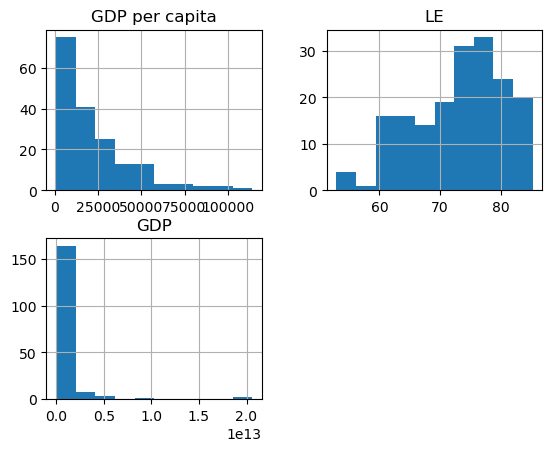

In [86]:
combDF = perCapitaGDP.merge(LE) #inner merge by default, ensures scrubbing of zones and keeps countries

combDF.columns = ['Country', 'Code', 'Year', 'GDP per capita', 'LE'] #rename columns for easier handling
combDF = combDF[['Country', 'GDP per capita', 'LE']]

combDF = combDF.merge(GDP) #all relevant data in one DF

combDF.hist(bins = 10) #making histograms for fun

### 2. Answers to questions in the assignment

#### Question 1: Which countries have a life expectancy higher than one standard deviation above the mean?

In [78]:
meanLE = combDF["LE"].mean() #calculates the mean value of the life expectancy column
stdLE = combDF["LE"].std() #calculates the standard deviation from same column

countriesHigherThanSTD = combDF[combDF.LE > meanLE + stdLE] # returns a dataframe with all the countries that have higher life expectancy than one standard deviation above the mean


#### Question 2: Which countries have high life expectancy but have low GDP

In [184]:
thresholdGDP = combDF['GDP'].quantile(.25) #
thresholdLE = combDF['LE'].quantile(.75)

lowGDP = combDF[combDF.GDP < thresholdGDP]

highLE = combDF[combDF.LE > thresholdLE]

df2 = lowGDP.merge(highLE)

df2['GDP'] = df2['GDP'] / 1000000  #return GDP in millions USD

df2

,Country,GDP per capita,LE,GDP
0,Bermuda,51003.266,81.0334,3188.010
1,Cyprus,32301.820,81.3970,28053.969
2,Iceland,53011.742,82.4042,17972.625
3,Maldives,19411.275,80.1160,10306.475
4,Malta,38910.080,83.2065,17134.908


#### Question 3 - Does every strong economy (normally indicated by GDP) have high life expectancy?

In [175]:
thresholdGDP = combDF['GDP'].quantile(.75) #upper quartile
thresholdLE = combDF['LE'].quantile(.25) 

highGDP = combDF[combDF.GDP > thresholdGDP]

lowLE = combDF[combDF.LE < thresholdLE]

df3 = highGDP.merge(lowLE)
df3

,Country,GDP per capita,LE,GDP
0,Nigeria,4983.6753,52.9104,1001537340000
1,Pakistan,5026.2085,66.7558,1088502500000
2,South Africa,12536.1350,66.1750,734094360000


#### After doing all necessary computations, create scatter plot

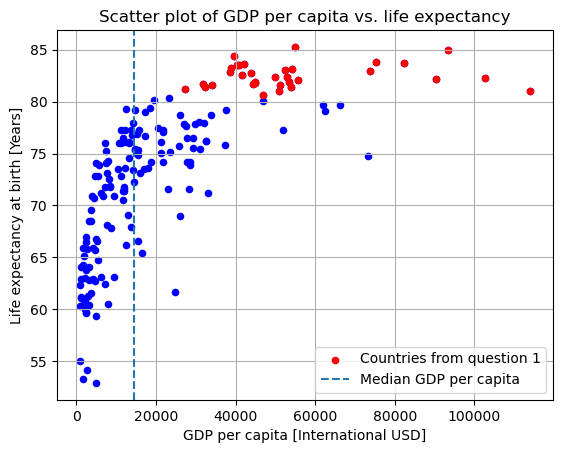

In [173]:
ax =  combDF.plot(kind='scatter', 
        x='GDP per capita', 
        y='LE', 
        color='blue')

countriesHigherThanSTD.plot(ax=ax, kind='scatter', 
        x='GDP per capita', 
        y='LE', 
        color='red',
        label='Countries from question 1')

plt.axvline(x=combDF['GDP per capita'].quantile(.50), linestyle='dashed', label='Median GDP per capita')
# plot properties
plt.title('Scatter plot of GDP per capita vs. life expectancy')
plt.grid()
plt.xlabel('GDP per capita [International USD]')
plt.ylabel('Life expectancy at birth [Years]')

plt.legend()

# show the plot
plt.savefig('scatter.png')
plt.show()